In [1]:
%matplotlib notebook

from matplotlib import pyplot
from pandas import Series
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import statsmodels.api as sm
import xlrd

In [2]:
def decompose(file, sheet_names, serie_column, frequency, model, **kwargs):
    # Load spreadsheet
    xl = pd.ExcelFile(file)

    # Select the data sheet 
    df = xl.parse(sheet_names)

    # Select serie and drop string date
    serie = df[['Data',serie_column]]
    
    # Include a "DatetimeIndex" object in the dataset to perform the decompose
    serie.index = pd.DatetimeIndex(freq="m", start=pd.datetime(2011, 3, 1), periods=89)

    # Remove string date
    del serie['Data']
    
    # Change the name of the serie to avoid conflict with numerical names
    serie.columns = ['serie']

    # Convert string to numbers and replace commas
    serie = serie.apply(lambda x: x.str.replace(',','.'))
    serie = serie.apply(pd.to_numeric, errors='ignore')

    # Decompose
    res = sm.tsa.seasonal_decompose(serie.serie.interpolate(), freq=frequency, model=model)

    # Show graph
    resplot = res.plot()

    # Save the image
    resplot.savefig(serie_column + '_seasonal_decompose.png', dpi=600)

<IPython.core.display.Javascript object>


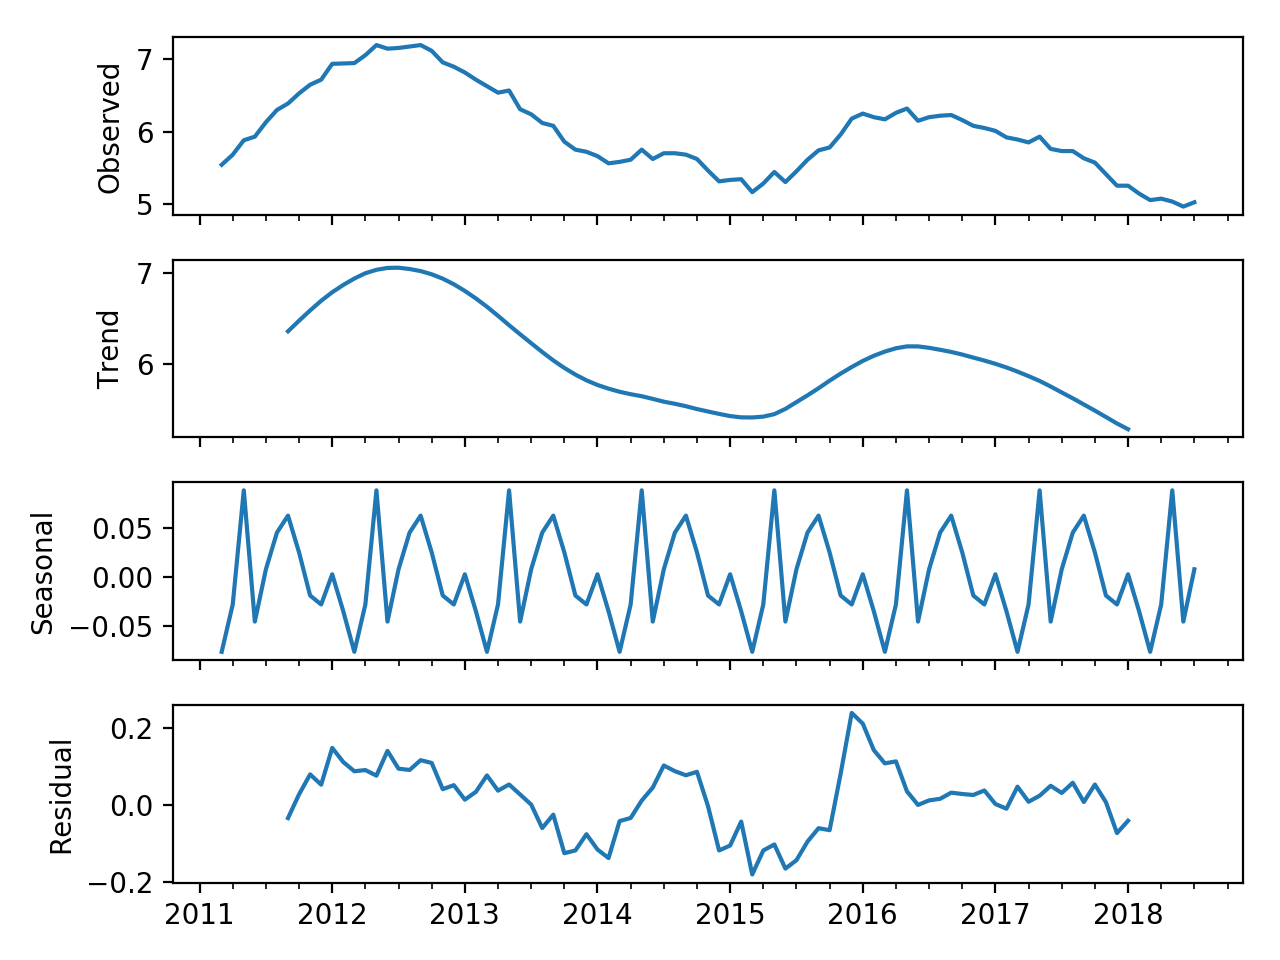

In [3]:
decompose('inadimplencia.xlsx', 'debt', '21112', 12, 'additive')